In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hiv_df = pd.read_csv("../data/hiv.csv")
hiv_df.head()

,Demographic Category,Demographic Type,HIV (non-AIDS) Count,HIV (non-AIDS) Category Percentage,HIV (non-AIDS) Population Rate,AIDS Count,AIDS Category Percentage,AIDS Population Rate,HIV/AIDS Count,HIV/AIDS Category Percentage,HIV/AIDS Population Rate
0,Gender,Male,39585,86.7,210.3,62864,87.5,334.0,102449,87.2,544.3
1,Gender,Female,5525,12.1,29.1,8091,11.3,42.6,13616,11.6,71.6
2,Gender,Transgender: Male To Female,482,1.1,NaN,104,0.1,NaN,182,0.2,NaN
3,Gender,Transgender: Female To Male,78,0.2,NaN,824,1.2,NaN,1306,1.1,NaN
4,Race/Ethnicity,Hispanic,14324,31.4,98.8,23781,33.1,164.0,38105,32.4,262.8


In [3]:
race_df = hiv_df.loc[hiv_df['Demographic Category'] == "Race/Ethnicity"]\
    .drop(['Demographic Category', 'HIV (non-AIDS) Category Percentage', 
           'AIDS Category Percentage', 'HIV/AIDS Category Percentage'], axis=1).dropna()
race_df

,Demographic Type,HIV (non-AIDS) Count,HIV (non-AIDS) Population Rate,AIDS Count,AIDS Population Rate,HIV/AIDS Count,HIV/AIDS Population Rate
4,Hispanic,14324,98.8,23781,164.0,38105,262.8
5,American Indian/Alaskan Native,195,118.6,270,164.3,465,282.9
6,Asian,1710,34.9,2395,48.9,4105,83.8
7,Native Hawaiian/Pacific Islander††,143,106.6,217,161.9,360,268.6
8,Black,8156,370.1,13123,595.5,21279,965.7
9,White,20376,136.3,31145,208.3,51521,344.5
10,Multi-race,766,79.2,938,97.0,1704,176.1


In [4]:
race_df = race_df.rename(columns = {'Demographic Type': 'Race',
                                   'HIV (non-AIDS) Population Rate': 'HIV (non-AIDS) Rate',
                                   'AIDS Population Rate': 'AIDS Rate',
                                   'HIV/AIDS Population Rate': 'HIV/AIDS Rate'})

In [5]:
new_races = ['American Indian and/or Alaska Native', 'Asian', 'Black or African American', 
             'Hispanic', 'Mixed Race', 'Native Hawaiian and Other Pacific Islander', 
             'White', 'Not Reported', 'Other']

In [6]:
hiv_races = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
            'Multi-race', 'Native Hawaiian/Pacific Islander††', 'White']

for i in range(len(race_df)):
    race = race_df.iloc[i, 0]
    if race in hiv_races:
        race_df.iloc[i, 0] = new_races[hiv_races.index(race)]
        
race_df = race_df.sort_values(by=['Race'])
race_df

,Race,HIV (non-AIDS) Count,HIV (non-AIDS) Rate,AIDS Count,AIDS Rate,HIV/AIDS Count,HIV/AIDS Rate
5,American Indian and/or Alaska Native,195,118.6,270,164.3,465,282.9
6,Asian,1710,34.9,2395,48.9,4105,83.8
8,Black or African American,8156,370.1,13123,595.5,21279,965.7
4,Hispanic,14324,98.8,23781,164.0,38105,262.8
10,Mixed Race,766,79.2,938,97.0,1704,176.1
7,Native Hawaiian and Other Pacific Islander,143,106.6,217,161.9,360,268.6
9,White,20376,136.3,31145,208.3,51521,344.5


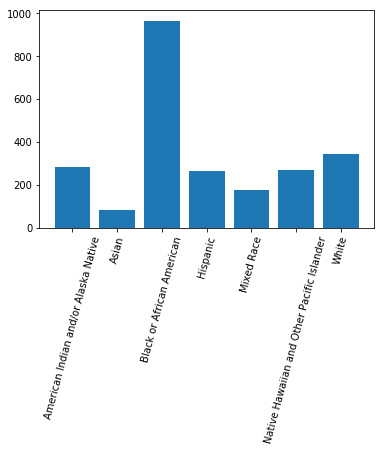

<Figure size 432x288 with 0 Axes>

In [7]:
plt.bar(race_df['Race'], race_df['HIV/AIDS Rate'])
plt.xticks(rotation=75)
plt.show()
plt.savefig('../images/hivaids.png')

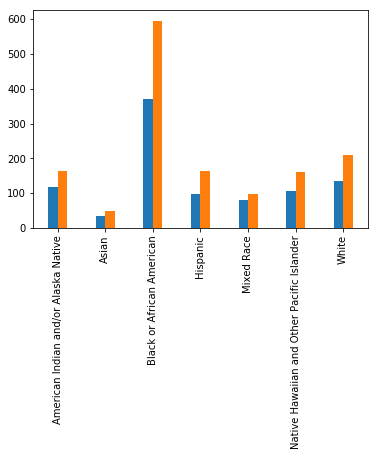

In [8]:
traces = ['HIV (non-AIDS) Rate', 'AIDS Rate']
x_cats = race_df['Race']
x_values = np.arange(len(x_cats))

for i in range(len(traces)):
    plt.bar(x_values+.2*(i-.5), race_df[traces[i]], width=.2)

plt.xticks(x_values, x_cats, rotation=90)
plt.savefig('../images/both.png')
plt.show()

In [9]:
sorted_df = race_df.sort_values(['HIV/AIDS Count'])
sorted_df

,Race,HIV (non-AIDS) Count,HIV (non-AIDS) Rate,AIDS Count,AIDS Rate,HIV/AIDS Count,HIV/AIDS Rate
7,Native Hawaiian and Other Pacific Islander,143,106.6,217,161.9,360,268.6
5,American Indian and/or Alaska Native,195,118.6,270,164.3,465,282.9
10,Mixed Race,766,79.2,938,97.0,1704,176.1
6,Asian,1710,34.9,2395,48.9,4105,83.8
8,Black or African American,8156,370.1,13123,595.5,21279,965.7
4,Hispanic,14324,98.8,23781,164.0,38105,262.8
9,White,20376,136.3,31145,208.3,51521,344.5


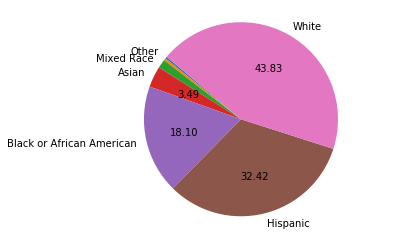

<Figure size 432x288 with 0 Axes>

In [31]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''

plt.pie(sorted_df['HIV/AIDS Count'], labels=['Other', ''] + sorted_df['Race'][2:].tolist(), 
        autopct=my_autopct, startangle=140)
plt.axis('equal')
plt.show()
plt.savefig('../images/hivaids.png')

In [11]:
race_df.to_csv("../data/cleaned/race.csv", index=False)